In [1]:
#Question 1a
import numpy as np
from scipy.linalg import norm

#Get data and process data
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
sample_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")
#As the question asks, we classify data into 5 different clusters
k = 5

--2023-02-28 07:32:33--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K   873KB/s    in 0.3s    

2023-02-28 07:32:34 (873 KB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



In [ ]:
sample_data
print(len(sample_data))

5000


In [2]:
#We have five pre-defined centroids, since the data is two dimensional, I will use an array to represent its pos in a two dimensional quadrant
x1 = [10,10]
x2 = [-10,-10]
x3 = [2,2]
x4 = [3,3]
x5 = [-3,-3]
centroids = []
centroids.append(x1)
centroids.append(x2)
centroids.append(x3)
centroids.append(x4)
centroids.append(x5)

In [3]:
#Function to calculate the cost function of each data point to the centroids
#And we assign the point to cluster where the centroid of that cluster has the minimum distance between current point and the centroid
def computeCost(data, centroids, clusters):
  for point in data:
    euc_dist = []
    for i in range(k):
      euc_dist.append(np.linalg.norm(np.array(point) - np.array(centroids[i])))
    clusters[euc_dist.index(min(euc_dist))].append(point)

In [4]:
#Recalculate the centroids of each clsuter, we use the average of each cluster as new centroid
def recalculate_centroids(centroids, clusters, k):
  for i in range(k):
    centroids[i] = np.average(clusters[i], axis=0)
  return centroids

In [5]:
def recalculate_clusters(data, centroids, k):
  clusters = {}
  for i in range(k):
    clusters[i] = []
  computeCost(data, centroids, clusters)
  return clusters

In [6]:
#As the question asks, we iterate the process for 100 times, we first calculate the distance from each point and assign data points based on cost
#Then we recalculate the centroids and repeating calculate the distance and assignment
for i in range(100):
  clusters = recalculate_clusters(sample_data, centroids, k)
  centroids = recalculate_centroids(centroids, clusters, k)

In [ ]:
print(clusters)

{0: [array([22.47614404,  2.06661161]), array([36.85173434,  2.47010346]), array([22.8325201 ,  1.70526612]), array([35.42549521, -0.12856642]), array([27.27271002,  1.13028483]), array([24.63430054,  0.05635948]), array([20.15400648,  1.96543119]), array([20.92751736,  1.35057002]), array([23.19441222,  2.29299367]), array([26.36701195,  1.70276183]), array([19.58796837, -3.58356272]), array([34.37566206, -3.47508938]), array([25.09260125,  5.66236753]), array([25.8157403 , -0.43769443]), array([20.30056505,  0.05245396]), array([28.29933268,  2.86761711]), array([23.47950224,  1.46393103]), array([25.02201069, -4.5634707 ]), array([29.47497397, -4.20797163]), array([25.62373833, -3.96846003]), array([30.9297744 ,  0.94330642]), array([37.55164398, -3.77217565]), array([24.87224056, -3.75219332]), array([21.39421671,  2.71781366]), array([30.02063389,  2.11058419]), array([25.69667062, -5.04736519]), array([32.03336504, -3.48112314]), array([25.79533821,  2.97587657]), array([32.38299

In [7]:
import random

def generate_random_color():
  r = lambda: random.randint(0, 255)
  return '#%02X%02X%02X' % (r(),r(),r())

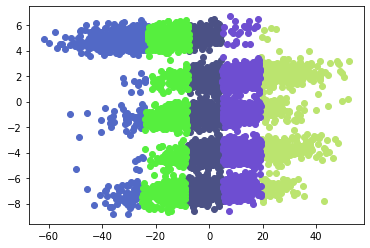

In [8]:
#Question 1b Scatter the results in two dimenstions
import matplotlib.pyplot as plt

for i in range(k):
  cluster_color = generate_random_color()
  colx = tuple(x[0] for x in clusters[i])
  coly = tuple(x[1] for x in clusters[i])
  plt.scatter(colx, coly, color = cluster_color)

In [9]:
#Question 2a.) To calculate Mahalanobis distance, first we wabt to calculate R=inverse of (matrix P sqaure * P)
from scipy import linalg

P = np.matrix('10 0.5; -10 0.25')
R = linalg.inv(np.dot(np.transpose(P), P))
R

array([[ 0.00555556, -0.04444444],
       [-0.04444444,  3.55555556]])

In [10]:
#Compute Mahalanobis Distance
def computeMahalDist(cur_centroid, cur_data_point):
  diff = np.subtract(cur_centroid, np.array(cur_data_point))
  dist = np.dot(np.dot(np.transpose(diff), R), diff)
  # print(type(dist))
  return dist  

In [11]:
def computeMahalCost(data, centroids, clusters):
  for point in data:
    mahal_dist = []
    for i in range(k):
      dist = computeMahalDist(centroids[i], point)
      mahal_dist.append(dist)
    clusters[mahal_dist.index(min(mahal_dist))].append(point)

In [12]:
#Recalculate cluster function
def recalculate_clusters_mahal(data, centroids, k):
  clusters = {}
  for i in range(k):
    clusters[i] = []
  computeMahalCost(data, centroids, clusters)
  return clusters 

In [14]:
for i in range(100):
  clusters2 = recalculate_clusters_mahal(sample_data, centroids2, k)
  centroids2 = recalculate_centroids(centroids2, clusters2, k)

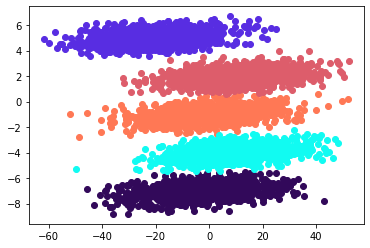

In [15]:
import matplotlib.pyplot as plt

for i in range(k):
  cluster_color2 = generate_random_color()
  colx1 = tuple(x[0] for x in clusters2[i])
  coly1 = tuple(x[1] for x in clusters2[i])
  plt.scatter(colx1, coly1, color = cluster_color2)

In [39]:
#Question 2b.)Calculate and print out the principle components of the data
def plotPCA(df):
  x = tuple(data[0] for data in df)
  y = tuple(data[1] for data in df)
  rcolor = generate_random_color()
  plt.scatter(x, y, color = rcolor)

In [80]:
from sklearn.decomposition import PCA
from scipy import stats
pca = PCA()
pca.fit(sample_data)
print("For aggreagated data: ")
print(pca.components_)

For aggreagated data: 
[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


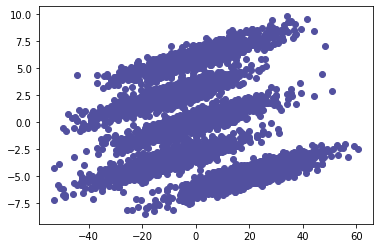

In [81]:
#Plot out PCA analysis 
dfB = pca.transform(sample_data)
plotPCA(dfB)

In [82]:
#Question 2c.)
for i in range(5):
  cluster_data = np.array(clusters2[i])
  pca.fit(cluster_data)
  print(f"Cluster {i} :")
  print(pca.components_)


Cluster 0 :
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
Cluster 1 :
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
Cluster 2 :
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]
Cluster 3 :
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]
Cluster 4 :
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]


In [79]:
#2d
PP = P.T @ P
K = np.linalg.eig(PP)
K

(array([200.031294,   0.281206]), matrix([[ 0.99992166, -0.01251662],
         [ 0.01251662,  0.99992166]]))